In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [55]:
N=100
x_start,x_end=-2,2
y_start,y_end=-1,1
x=numpy.linspace(x_start,x_end,N)
y=numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)
N_vortex = 20
x_vortex=numpy.linspace(x_start,x_end,N_vortex)
y_vortex=numpy.linspace(0,0,N_vortex)
gamma=5*numpy.ones(N_vortex)

In [56]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [57]:
U_vortex=0.0
V_vortex=0.0
for i in range(x_vortex.size):
    u_vortex, v_vortex = get_velocity_vortex(gamma[i], x_vortex[i], y_vortex[i], X, Y)
    U_vortex += u_vortex
    V_vortex += v_vortex
    


In [58]:
Psi_vortex=0.0
for i in range(x_vortex.size):
    psi_vortex = get_stream_function_vortex(gamma[i], x_vortex[i], y_vortex[i], X, Y)
    Psi_vortex +=psi_vortex

In [59]:
u =U_vortex
v =V_vortex
psi = Psi_vortex


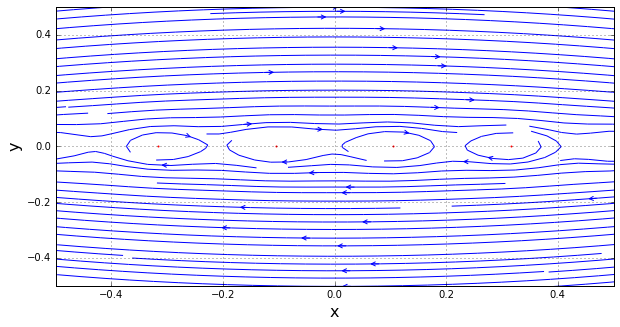

In [63]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-0.5,0.5)
pyplot.ylim(-0.5,0.5)
pyplot.streamplot(X, Y, u, v, density=3, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='r', s=1, marker='o')
